# Final Project

## 移除不必要的警告

In [1]:
# 移除不必要的警告
import warnings
warnings.filterwarnings('ignore')

### 獲取歷史資料

In [2]:
from finlab.data import Data
from finlab.ml import fundamental_features
fdf = fundamental_features()

data = Data()

close = data.get("收盤價")
open_ = data.get("開盤價")
high = data.get("最高價")
low = data.get("最低價")
vol = data.get("成交股數")

PB = data.get("股價淨值比")
pe = data.get("本益比")

#close = data.get_adj("收盤價").round(2)

#財務指標
rev = data.get("當月營收")
l_rev = data.get("去年當月營收")

#t123 = data.get('土地')

#bargin_i=data.get("投信買賣超股數")
#bargin_f=data.get("外資自營商買賣超股數")
#bargin_s=data.get("自營商買賣超股數(自行買賣)")
#

rev.index = rev.index.shift(5, "d")         #每月頻率
#t123.index = t123.index.shift(5, "d")       #季頻率
#周頻率

### 計算features

In [3]:
#MFI  = data.talib("MFI")
##MFI.tail()

In [4]:
#ub,mb,lb =data.talib("BBANDS")

In [5]:
##############################################　　　自己加入的　　　##############################################
import pandas as pd
from finlab.__init__ import talib_all_stock
from talib import abstract

#### 營收相關

In [6]:
##########################

In [7]:
from finlab.ml import fundamental_features

df1 = fundamental_features()

In [8]:
##########################

In [9]:
def bias(n):
    return close / close.rolling(n, min_periods=1).mean()

def acc(n):
    return close.shift(n) / (close.shift(2*n) + close) * 2

def rsv(n):
    l = close.rolling(n, min_periods=1).min()
    h = close.rolling(n, min_periods=1).max()
    
    return (close - l) / (h - l)

def mom(n):
    return (rev / rev.shift(1)).shift(n)

def yoy(n):
    return (rev.shift(n) / rev.shift(12+n)) -1


features = {
    'mom1': mom(1),
    'mom2': mom(2),
    'mom3': mom(3),
    'mom4': mom(4),
    'mom5': mom(5),
    'mom6': mom(6),
    'mom7': mom(7),
    'mom8': mom(8),
    'mom9': mom(9),
    
    'bias5': bias(5),
    'bias10': bias(10),
    'bias20': bias(20),
    'bias60': bias(60),
    'bias120': bias(120),
    'bias240': bias(240),
    
    'acc5': acc(5),
    'acc10': acc(10),
    'acc20': acc(20),
    'acc60': acc(60),
    'acc120': acc(120),
    'acc240': acc(240),
    
    'rsv5': rsv(5),
    'rsv10': rsv(10),
    'rsv20': rsv(20),
    'rsv60': rsv(60),
    'rsv120': rsv(120),
    'rsv240': rsv(240),
###############################################
    
    'yoy': yoy(1),
    'delta_yoy':(yoy(1)/yoy(2))-1,
    
    'PB':PB,
    'PE':pe,       

}


In [10]:
mom(1).unstack()

stock_id  date      
1101      2005-02-15         NaN
          2005-03-15         NaN
          2005-04-15    0.570159
          2005-05-15    1.599304
          2005-06-15    0.965557
                          ...   
9962      2022-06-15    0.678559
          2022-07-15    0.917472
          2022-08-15    1.694666
          2022-09-15    0.641536
          2022-10-15    1.280940
Length: 427491, dtype: float64

#### 財報指標

In [11]:
from finlab.ml import fundamental_features
F_dataset = fundamental_features()
F_dataset = F_dataset.dropna(thresh=int(len(F_dataset)*0.5), axis=1).dropna(how='any')
F_dataset.head()

T3395營業利益  T7210營運現金流  T3950歸屬母公司淨利    T7211折舊  \
stock_id date                                                         
1101     2014-05-15  3684224.0   6895832.0     4015175.0  1594505.0   
         2014-08-14  5938317.0   4452573.0     -754894.0  1573692.0   
         2014-11-14  5544164.0   3701961.0     3621052.0  1587492.0   
         2015-03-31  4690964.0   4936554.0     6459366.0  1575810.0   
         2015-05-15  1693508.0   5654152.0      349121.0  1711428.0   

                      T0100流動資產   T1100流動負債  T7324取得不動產廠房及設備  T3970經常稅後淨利  \
stock_id date                                                               
1101     2014-05-15  92121458.0  74388787.0        -940633.0    2791235.0   
         2014-08-14  89163129.0  81190613.0        -465009.0    4828695.0   
         2014-11-14  89472928.0  78920574.0        -911057.0    4934486.0   
         2015-03-31  96605816.0  68632044.0       -1384489.0    4029460.0   
         2015-05-15  92471096.0  69579858.0        -818460.0     974518.0   

                     R101_ROA稅後息前  R11V_ROA綜合損益  ...  R409_淨值成長率   R501_流動比率  \
stock_id date                                    ...                           
1101     2014-05-15     -1.732411      1.630076  ...    8.866880  123.837828   
         2014-08-14     -0.952778      0.152556  ...    5.954576  109.819505   
         2014-11-14     -0.948101      2.168353  ...    5.657634  113.370853   
         2015-03-31     -1.265106      3.002608  ...    5.467505  140.759054   
         2015-05-15     -2.315297      0.069454  ...    2.505042  132.899231   

                      R502_速動比率  R503_利息支出率   R678_營運資金  R607_總資產週轉次數  \
stock_id date                                                           
1101     2014-05-15  101.776758   -9.792979  17732671.0      0.093998   
         2014-08-14   91.450337  -17.435186   7972516.0      0.112552   
         2014-11-14   93.976558  -17.800651  10552354.0      0.106864   
         2015-03-31  117.966121  -13.169666  27973772.0      0.103034   
         2015-05-15  109.303861   -7.153186  22891238.0      0.073611   

                     R610_存貨週轉率  R612_固定資產週轉次數  R613_淨值週轉率次  R69B_自由現金流量  
stock_id date                                                             
1101     2014-05-15    2.191306       0.245688     0.171327    4901868.0  
         2014-08-14    2.381079       0.297377     0.208493   16542181.0  
         2014-11-14    2.306032       0.282283     0.200028    4768224.0  
         2015-03-31    2.268994       0.275197     0.187942  -10525322.0  
         2015-05-15    1.817298       0.195713     0.132250    8494249.0  

[5 rows x 48 columns]

#### 技術指標

In [12]:
# https://zhuanlan.zhihu.com/p/342075180 talib函数功能一览表

def bias(n):
    return close / close.rolling(n, min_periods=1).mean()

def acc(n):
    return close.shift(n) / (close.shift(2*n) + close) * 2

def rsv(n):
    l = close.rolling(n, min_periods=1).min()
    h = close.rolling(n, min_periods=1).max()
    
    return (close - l) / (h - l)

def mom(n):
    return (rev / rev.shift(1)).shift(n)


def bi_(n):
    return (bargin_i / vol.shift(1)).shift(n)

def bf(n):
    return (bargin_f / vol.shift(1)).shift(n)
    
def bs(n):
    return (bargin_s / vol.shift(1)).shift(n)

def rsi(n):
    #return talib_all_stock(ndays=10000, func=abstract.RSI, timeperiod=n)
    return data.talib("RSI",timeperiod=n)

def MFI(n):
    return data.talib("MFI",timeperiod=n)

def obv(n):
    return data.talib("OBV",timeperiod=n)



features = {
    
#    'ATR14':data.talib("ATR",timeperiod=14),
#    'NATR14':data.talib('NATR',timeperiod=14),
#    'TRANGE':data.talib('TRANGE'),
#    'Adosc3':data.talib('ADOSC',timeperiod=3),
    
#    "MFI5":MFI(5),
#    "MFI10":MFI(10),

#    'rsi6': rsi(6),  #DataFrame
#    'rsi10': rsi(10),  #DataFrame
#    'rsi14': rsi(14),  #DataFrame
#    'rsi20': rsi(20),  #DataFrame
#    'rsi50': rsi(50),  #DataFrame
#   
    'mom1': mom(1),
    'mom2': mom(2),
    'mom3': mom(3),
    'mom4': mom(4),
    'mom5': mom(5),
    'mom6': mom(6),
    'mom7': mom(7),
    'mom8': mom(8),
    'mom9': mom(9),
    
#    'yoy': yoy(1),
#    'delta_yoy':(yoy(1)/yoy(2))-1,
    
#    'ff':ff,
    'PB':PB,
    'PE':pe,   
#  
    'bias5': bias(5),
    'bias10': bias(10),
    'bias20': bias(20),
    'bias60': bias(60),
    'bias120': bias(120),
    'bias240': bias(240),
    
    'acc5': acc(5),
    'acc10': acc(10),
    'acc20': acc(20),
    'acc60': acc(60),
    'acc120': acc(120),
    'acc240': acc(240),
    
    'rsv5': rsv(5),
    'rsv10': rsv(10),
    'rsv20': rsv(20),
    'rsv60': rsv(60),
    'rsv120': rsv(120),
    'rsv240': rsv(240),
}


#### 確認各指標清單

In [13]:
list1=sorted(features)
list1

['PB',
 'PE',
 'acc10',
 'acc120',
 'acc20',
 'acc240',
 'acc5',
 'acc60',
 'bias10',
 'bias120',
 'bias20',
 'bias240',
 'bias5',
 'bias60',
 'mom1',
 'mom2',
 'mom3',
 'mom4',
 'mom5',
 'mom6',
 'mom7',
 'mom8',
 'mom9',
 'rsv10',
 'rsv120',
 'rsv20',
 'rsv240',
 'rsv5',
 'rsv60']

In [14]:
#t1 = data.talib("NATR",timeperiod=14)
#t1.to_csv('myfile.csv')

### 製作dataset

##### 設定買賣頻率

In [15]:
#rev.index = rev.index.tz_localize("Asia/Taipei")
every_month = rev.index
every_month

DatetimeIndex(['2005-02-15', '2005-03-15', '2005-04-15', '2005-05-15',
               '2005-06-15', '2005-07-15', '2005-08-15', '2005-09-15',
               '2005-10-15', '2005-11-15',
               ...
               '2022-01-15', '2022-02-15', '2022-03-15', '2022-04-15',
               '2022-05-15', '2022-06-15', '2022-07-15', '2022-08-15',
               '2022-09-15', '2022-10-15'],
              dtype='datetime64[ns]', name='date', length=213, freq=None)

#### 將dataframe 組裝起來

In [16]:
# features['bias20'].reindex(every_month, method='ffill')

for name, f in features.items():
    features[name] = f.reindex(every_month, method='ffill')

In [17]:

for name, f in features.items():
    features[name] = f.unstack()

In [18]:
import pandas as pd
dataset = pd.DataFrame(features)

In [19]:
feature_names = list(dataset.columns)

In [20]:
##############################################　　　自己加入的　　　##############################################
dataset.index = dataset.index.set_names(['stock_id','date'], level=[0,1])


#dataset.index.levels[1].name = 'date'
#dataset.index.levels[0].name = 'stock_id'

#因為你pandas更新到新版了
## profit.index.levels[0].name = 'year'
## profit.index.levels[1].name = 'month'
#這兩行的語法被棄用，請改成
#profit.index=profit.index.set_names('year', level=0)
#profit.index=profit.index.set_names('month', level=1)
#or profit.index=profit.index.set_names(['year','month'], level=[0,1])
#直接一行
#就可以了

### 新增 label

In [21]:
from finlab import ml

ml.add_profit_prediction(dataset)
ml.add_rank_prediction(dataset)

### 刪除太大太小的歷史資料

In [22]:
print(dataset.shape)

def drop_extreme_case(dataset, feature_names, thresh=0.01):
    
    extreme_cases = pd.Series(False, index=dataset.index)
    for f in feature_names:
        tf = dataset[f]
        extreme_cases = extreme_cases | (tf < tf.quantile(thresh)) | (tf > tf.quantile(1-thresh))
    dataset = dataset[~extreme_cases]
    return dataset

dataset_drop_extreme_case = drop_extreme_case(dataset , list1 , thresh=0.01)

print(dataset_drop_extreme_case.shape)

(434307, 31)
(377176, 31)


In [23]:
dataset_dropna = dataset_drop_extreme_case.dropna(how='any')
dataset_dropna = dataset_dropna.reset_index().set_index("date")

In [24]:
dataset_drop_extreme_case.index.get_level_values("date")

DatetimeIndex(['2005-02-15', '2005-03-15', '2005-04-15', '2005-05-15',
               '2005-06-15', '2005-07-15', '2005-08-15', '2005-09-15',
               '2005-10-15', '2005-11-15',
               ...
               '2021-09-15', '2021-11-15', '2021-12-15', '2022-02-15',
               '2022-03-15', '2022-04-15', '2022-06-15', '2022-08-15',
               '2022-09-15', '2022-10-15'],
              dtype='datetime64[ns]', name='date', length=377176, freq=None)

In [25]:
##############################################　　　自己加入的　　　##############################################

dataset_dropna.index = pd.to_datetime(dataset_dropna.index)
dataset_dropna = dataset_dropna.sort_index()

#修復＜class ‘numpy.ndarray‘＞　https://blog.csdn.net/lxbin/article/details/114005757

In [26]:
dataset_train = dataset_dropna[:'2020']
dataset_test = dataset_dropna['2021':]

### 神經網路模型

In [27]:
##############################################　　　自己加入的　　　##############################################


#pip3 install --upgrade protobuf==3.20.1 --user
#
#python AssertionError: ＜class ‘numpy.ndarray‘＞
#
#If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
#
#https://github.com/SeldonIO/MLServer/issues/615

In [28]:
### 1. Downgrade the protobuf package to 3.20.x or lower.
##卸载protobuf
#!pip uninstall protobuf
##安装低版本protobuf
#!pip install protobuf==3.19.0

#### keras

In [29]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers

import os


os.environ['KMP_DUPLICATE_LIB_OK']='True'

model = keras.models.Sequential()
model.add(layers.Dense(100, activation='relu',
                      input_shape=(len(feature_names),),
                      kernel_initializer=initializers.he_normal(seed=0)))
model.add(layers.Dense(100, activation='relu',
                      kernel_initializer=initializers.he_normal(seed=0)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(1, activation='sigmoid'))


model.summary()

model.compile(loss='mean_squared_error',
              optimizer="adam",)

print('start fitting')
history = model.fit(dataset_train[feature_names], dataset_train['rank'],
                    batch_size=1000,         #1000  #每一个batch的大小
                    epochs=225, #225          #迭代次数
                    verbose=1,
                    validation_split=0.1,
                    #validation_data =        #(测试集的输入特征，测试集的标签），
                    #validation_split =       # 从测试集中划分多少比例给训练集，
                    #validation_freq = 20        #测试的epoch间隔数                     
                   )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3000      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 13,201
Trainable params: 13,201
Non-trainable params: 0
_________________________________________________________________
start fitting
Epoch 1/225
103/103 [==============================] - ETA: 0s - loss: 0.274 - ETA: 0s - loss: 0.257 - ETA: 0s - loss: 0.235 - ETA: 0s - loss: 0.202 - ETA: 0s - loss: 0.172 - ETA: 0s - loss: 0.151 - 1s 5ms/step - loss: 0.1428 - val_loss

##### 結果

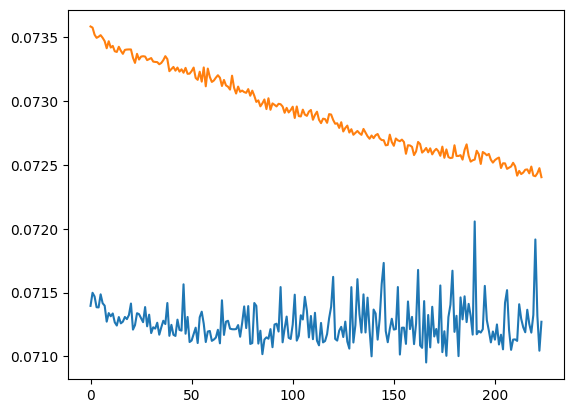

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['val_loss'][1:])
plt.plot(history.history['loss'][1:])

#### lightgbm Model

In [31]:
import lightgbm as lgb

cf = lgb.LGBMRegressor(colsample_bytree=0.8626313651274391, metric='None',
                       min_child_samples=468, min_child_weight=0.01, n_estimators=5000,
                       n_jobs=4, num_leaves=33, random_state=314, reg_alpha=7,
                       reg_lambda=0.1, subsample=0.7272577195782406)

In [32]:
##############################################　　　自己加入的　　　##############################################

train = dataset_train[feature_names] , dataset_train['return'] > 1
test = dataset_test[feature_names] , dataset_test['return'] > 1 

print('---cf.fit---')
print(cf.fit(*train))
print('---cf.score---')
print(cf.score(*test))
print('---predict---')
print(cf.predict(test[0]))

---cf.fit---
LGBMRegressor(colsample_bytree=0.8626313651274391, metric='None',
              min_child_samples=468, min_child_weight=0.01, n_estimators=5000,
              n_jobs=4, num_leaves=33, random_state=314, reg_alpha=7,
              reg_lambda=0.1, subsample=0.7272577195782406)
---cf.score---
-0.08560751430425517
---predict---
[0.30155487 0.34223083 0.39645406 ... 0.25194031 0.34356368 0.24472151]


##### 最佳化調整

In [33]:
###############################################　　　自己加入的　　　##############################################
#
#import lightgbm as lgb
#
#fit_params={"early_stopping_rounds":30, 
#            "eval_metric" : 'auc', 
#            "eval_set" : [test],
#            'eval_names': ['valid'],
#            'verbose': 100,
#            'categorical_feature': 'auto'}
#
#from scipy.stats import randint as sp_randint
#from scipy.stats import uniform as sp_uniform
#
#param_test ={'num_leaves': sp_randint(6, 50), 
#             'min_child_samples': sp_randint(100, 500), 
#             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
#             'subsample': sp_uniform(loc=0.2, scale=0.8), 
#             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
#             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
#             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}
#
##This parameter defines the number of HP points to be tested
#n_HP_points_to_test = 500
#
#from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#
##n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
#
#clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
#gs = RandomizedSearchCV(
#    estimator=clf, param_distributions=param_test, 
#    n_iter=n_HP_points_to_test,
#    scoring='roc_auc',
#    cv=3,
#    refit=True,
#    random_state=314,
#    verbose=True)
#
#gs.fit(*train, **fit_params)

In [34]:
################################################　　　自己加入的　　　##############################################
#gs.best_estimator_
###t1

In [35]:
#import numpy as np
#import pandas as pd
#import lightgbm as lgb
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = \
#    train_test_split(data.iloc[:, 0:-1], # feature
#                     data.iloc[:, -1], # label
#                     test_size=0.2,#训练集、测试集割比例
#                     stratify=data.iloc[:-1],# 这里保证割后y的比例布与原数据一致
#                    )
#
#    gbm = lgb.LGBMClassifier(colsample_bytree=0.7,
#                             max_depth=-6,
#                             min_child_weight=0.0,)
#                     
#    gbm.fit(X_train, y_train)
#    gbm_y_pre=gbm.predict(x_test)#分类的类别
#    gbm_y_proba=gbm.predict_proba(X_test)# 分类的概率值

In [36]:
###############################################　　　自己加入的　　　##############################################
#
#import matplotlib.pyplot as plt
#
#from sklearn.metrics import roc_auc_score, roc_curve
#
#gbm_auc = roc_auc_score(y_test,gbm_y_proba[:,1]) #计算auc
#gbm_fpr,gbm_tpr,gbm_threasholds = roc_curve(y_test,gbm_y_proba[:,1])#计算ROC的值
#plt.title("roc_curve of %s(AUC=%.4f)" % ('gbm', gbm_auc))
#plt.xlabel('Specificity') # specificity= 1 - np.array(gbm_fpr))
#plt.ylabel('Sensitivity') # sensitivity = gbm_tpr
#plt.plot(list(1 - np.array(gbm_fpr)), gbm_tpr)
#plt.gca().invert_xaxis()# 将轴反转
#plt.show()

In [37]:
#import lightgbm as lgb
cf = lgb.LGBMRegressor(colsample_bytree=0.7740467183023685, metric='None',
               min_child_samples=395, min_child_weight=0.01, n_estimators=5000,
               n_jobs=4, num_leaves=9, random_state=314, reg_alpha=5,
               reg_lambda=10, subsample=0.4643892520208455)
    
cf.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])

LGBMRegressor(colsample_bytree=0.7740467183023685, metric='None',
              min_child_samples=395, min_child_weight=0.01, n_estimators=5000,
              n_jobs=4, num_leaves=9, random_state=314, reg_alpha=5,
              reg_lambda=10, subsample=0.4643892520208455)

In [38]:
cf.score(*test)

-0.011885443150031705

#### Random Forest Model

In [39]:
from finlab.ml import fundamental_features
F_dataset = fundamental_features()
F_dataset = F_dataset.dropna(thresh=int(len(F_dataset)*0.5), axis=1).dropna(how='any')
F_dataset.head()

T3395營業利益  T7210營運現金流  T3950歸屬母公司淨利    T7211折舊  \
stock_id date                                                         
1101     2014-05-15  3684224.0   6895832.0     4015175.0  1594505.0   
         2014-08-14  5938317.0   4452573.0     -754894.0  1573692.0   
         2014-11-14  5544164.0   3701961.0     3621052.0  1587492.0   
         2015-03-31  4690964.0   4936554.0     6459366.0  1575810.0   
         2015-05-15  1693508.0   5654152.0      349121.0  1711428.0   

                      T0100流動資產   T1100流動負債  T7324取得不動產廠房及設備  T3970經常稅後淨利  \
stock_id date                                                               
1101     2014-05-15  92121458.0  74388787.0        -940633.0    2791235.0   
         2014-08-14  89163129.0  81190613.0        -465009.0    4828695.0   
         2014-11-14  89472928.0  78920574.0        -911057.0    4934486.0   
         2015-03-31  96605816.0  68632044.0       -1384489.0    4029460.0   
         2015-05-15  92471096.0  69579858.0        -818460.0     974518.0   

                     R101_ROA稅後息前  R11V_ROA綜合損益  ...  R409_淨值成長率   R501_流動比率  \
stock_id date                                    ...                           
1101     2014-05-15     -1.732411      1.630076  ...    8.866880  123.837828   
         2014-08-14     -0.952778      0.152556  ...    5.954576  109.819505   
         2014-11-14     -0.948101      2.168353  ...    5.657634  113.370853   
         2015-03-31     -1.265106      3.002608  ...    5.467505  140.759054   
         2015-05-15     -2.315297      0.069454  ...    2.505042  132.899231   

                      R502_速動比率  R503_利息支出率   R678_營運資金  R607_總資產週轉次數  \
stock_id date                                                           
1101     2014-05-15  101.776758   -9.792979  17732671.0      0.093998   
         2014-08-14   91.450337  -17.435186   7972516.0      0.112552   
         2014-11-14   93.976558  -17.800651  10552354.0      0.106864   
         2015-03-31  117.966121  -13.169666  27973772.0      0.103034   
         2015-05-15  109.303861   -7.153186  22891238.0      0.073611   

                     R610_存貨週轉率  R612_固定資產週轉次數  R613_淨值週轉率次  R69B_自由現金流量  
stock_id date                                                             
1101     2014-05-15    2.191306       0.245688     0.171327    4901868.0  
         2014-08-14    2.381079       0.297377     0.208493   16542181.0  
         2014-11-14    2.306032       0.282283     0.200028    4768224.0  
         2015-03-31    2.268994       0.275197     0.187942  -10525322.0  
         2015-05-15    1.817298       0.195713     0.132250    8494249.0  

[5 rows x 48 columns]

In [40]:
## Add labels

In [41]:
F_features = F_dataset.columns

import finlab.ml as ml

ml.add_profit_prediction(F_dataset)
F_dataset = F_dataset.dropna()
F_dataset.head()

T3395營業利益  T7210營運現金流  T3950歸屬母公司淨利    T7211折舊  \
stock_id date                                                         
1101     2014-05-15  3684224.0   6895832.0     4015175.0  1594505.0   
         2014-08-14  5938317.0   4452573.0     -754894.0  1573692.0   
         2014-11-14  5544164.0   3701961.0     3621052.0  1587492.0   
         2015-03-31  4690964.0   4936554.0     6459366.0  1575810.0   
         2015-05-15  1693508.0   5654152.0      349121.0  1711428.0   

                      T0100流動資產   T1100流動負債  T7324取得不動產廠房及設備  T3970經常稅後淨利  \
stock_id date                                                               
1101     2014-05-15  92121458.0  74388787.0        -940633.0    2791235.0   
         2014-08-14  89163129.0  81190613.0        -465009.0    4828695.0   
         2014-11-14  89472928.0  78920574.0        -911057.0    4934486.0   
         2015-03-31  96605816.0  68632044.0       -1384489.0    4029460.0   
         2015-05-15  92471096.0  69579858.0        -818460.0     974518.0   

                     R101_ROA稅後息前  R11V_ROA綜合損益  ...   R501_流動比率   R502_速動比率  \
stock_id date                                    ...                           
1101     2014-05-15     -1.732411      1.630076  ...  123.837828  101.776758   
         2014-08-14     -0.952778      0.152556  ...  109.819505   91.450337   
         2014-11-14     -0.948101      2.168353  ...  113.370853   93.976558   
         2015-03-31     -1.265106      3.002608  ...  140.759054  117.966121   
         2015-05-15     -2.315297      0.069454  ...  132.899231  109.303861   

                     R503_利息支出率   R678_營運資金  R607_總資產週轉次數  R610_存貨週轉率  \
stock_id date                                                           
1101     2014-05-15   -9.792979  17732671.0      0.093998    2.191306   
         2014-08-14  -17.435186   7972516.0      0.112552    2.381079   
         2014-11-14  -17.800651  10552354.0      0.106864    2.306032   
         2015-03-31  -13.169666  27973772.0      0.103034    2.268994   
         2015-05-15   -7.153186  22891238.0      0.073611    1.817298   

                     R612_固定資產週轉次數  R613_淨值週轉率次  R69B_自由現金流量    return  
stock_id date                                                           
1101     2014-05-15       0.245688     0.171327    4901868.0  1.073347  
         2014-08-14       0.297377     0.208493   16542181.0  0.984816  
         2014-11-14       0.282283     0.200028    4768224.0  0.969163  
         2015-03-31       0.275197     0.187942  -10525322.0  0.956818  
         2015-05-15       0.195713     0.132250    8494249.0  0.850077  

[5 rows x 49 columns]

## Split Train Test dataset

In [42]:
F_select = F_dataset.index.get_level_values('date') < '2021'
F_dataset_train = F_dataset[F_select]
F_dataset_test = F_dataset[~F_select]

In [43]:
#原本的指令
from sklearn.ensemble import RandomForestRegressor

cf2 = RandomForestRegressor(n_estimators=100)
cf2.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])  

RandomForestRegressor()

##### 最佳化調整

<AxesSubplot:xlabel='Value', ylabel='Feature'>

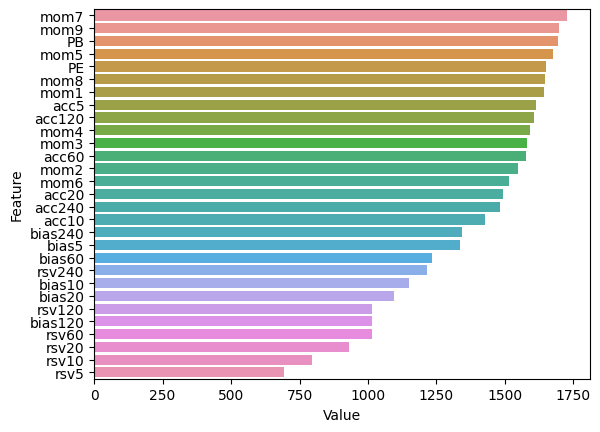

In [44]:
feature_imp = pd.DataFrame(zip(cf.feature_importances_, feature_names), 
                           columns=['Value','Feature']).sort_values('Value', ascending=False)
feature_imp

%matplotlib inline
import seaborn as sns
sns.barplot(x="Value", y="Feature", data=feature_imp)

In [45]:
select = dataset.index.get_level_values('date') < '2021'
dataset_train = dataset[select]
dataset_test = dataset[~select]

### Ensemble learning

In [46]:
dataset_drop = dataset.dropna(subset=feature_names+['return'])

vals = model.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result1'] = pd.Series(vals.swapaxes(0,1)[0], dataset_drop.index)

vals = cf.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result2'] = pd.Series(vals, dataset_drop.index)

vals = cf2.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result3'] = pd.Series(vals, dataset_drop.index)

dataset_drop = dataset_drop.reset_index().set_index("date")

## backtest

<AxesSubplot:xlabel='date'>

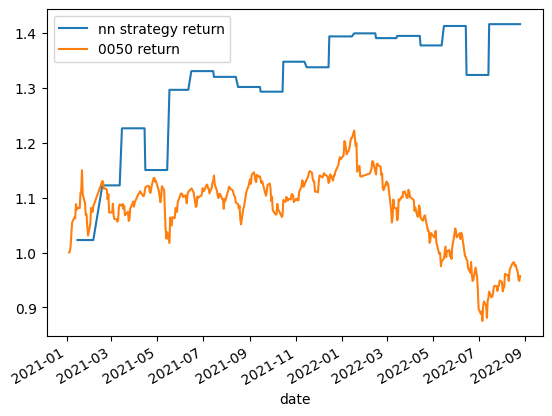

In [47]:
import math


dates = sorted(list(set(dataset_drop.index)))

rs = []
for d in dates:
    
    dataset_time = dataset_drop.loc[d]
    
    dataset_time = drop_extreme_case(dataset_time , list1 , thresh=0.01)
    
    rank = dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3'] 
    
    condition = (rank >= rank.nlargest(20).iloc[-1]) 
    r = dataset_time['return'][condition].mean()

    rs.append(r * (1-3/1000-1.425/1000*2*0.6))

rs = pd.Series(rs, index=dates)['2021':].cumprod()


s0050 = close['0050']['2021':]

pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill'), '0050 return':s0050/s0050[0]}).plot()



In [48]:
import pickle

return_history_1026 = pd.Series(rs, index=dates).cumprod()
#eq = (gain[hold == 1].mean(axis=1)).fillna(1).cumprod()

pickle.dump(rs, open('return_history_1026.pkl', 'wb'))

In [49]:
#import pyfolio as pf
#import pandas as pd
#
#close.index = close.index.tz_localize("Asia/Taipei")
##pf.create_returns_tear_sheet(close['0050'].pct_change())
#
## 得到 上一個單元的 回測結果
#ret = pickle.load(open("return_history_1026.pkl", "rb"))
#
## 將回測報酬率取出來
#ret = ret.pct_change().dropna()
#ret.index = pd.to_datetime(ret.index).tz_localize('Asia/Taipei')
#
## 利用pyfolio 比較報酬率
#pf.create_returns_tear_sheet(ret, benchmark_rets=close['0050'].pct_change())

### 當月持股狀況

In [50]:
dataset.index.levels[1]

DatetimeIndex(['2005-02-15', '2005-03-15', '2005-04-15', '2005-05-15',
               '2005-06-15', '2005-07-15', '2005-08-15', '2005-09-15',
               '2005-10-15', '2005-11-15',
               ...
               '2022-01-15', '2022-02-15', '2022-03-15', '2022-04-15',
               '2022-05-15', '2022-06-15', '2022-07-15', '2022-08-15',
               '2022-09-15', '2022-10-15'],
              dtype='datetime64[ns]', name='date', length=213, freq=None)

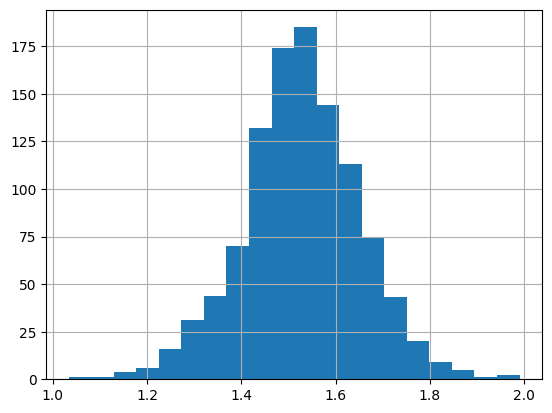

In [51]:
# get the latest dataset
last_date = "2022-10-15"#dataset.index.levels[1].max()
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()


last_dataset = drop_extreme_case(last_dataset, list1 , thresh=0.01)


# remove NaN testcases
last_dataset = last_dataset.dropna(subset=feature_names)

# predict

vals = model.predict(last_dataset[feature_names].astype(float))
last_dataset['result1'] = pd.Series(vals.swapaxes(0,1)[0], last_dataset.index)

vals = cf.predict(last_dataset[feature_names].astype(float))
last_dataset['result2'] = pd.Series(vals, last_dataset.index)

vals = cf2.predict(last_dataset[feature_names].astype(float))
last_dataset['result3'] = pd.Series(vals, last_dataset.index)

# calculate score

rank = last_dataset['result1'] + last_dataset['result2'] + last_dataset['result3']
condition = (rank >= rank.nlargest(20).iloc[-1]) 

# plot rank distribution
rank.hist(bins=20)


# show the best 20 stocks
slist1 = rank[condition].reset_index()['stock_id']

#https://keras-cn.readthedocs.io/en/latest/models/model/

## 平均分配資產於股票之中

In [52]:
close = data.get("收盤價")

money = 60000
stock_prices = close[rank[condition].reset_index()['stock_id']].iloc[-1]


print("股票平分張數:")
money / len(stock_prices) / stock_prices / 1000


股票平分張數:


stock_id
1338    0.051813
1720    0.061983
2313    0.058939
2474    0.016620
2534    0.116959
2640    0.035377
2850    0.052632
3017    0.026786
3479    0.045317
3704    0.105079
4163    0.032432
4566    0.053191
4707    0.225564
5425    0.033445
5536    0.015190
6123    0.054945
6146    0.012848
6184    0.061792
6716    0.031480
8403    0.080214
Name: 2022-08-25 00:00:00, dtype: float64

## 將績效表現存檔

In [53]:
import pickle
pickle.dump(eq, open('return_history.pkl', 'wb'))

NameError: name 'eq' is not defined